In [1]:
from fastai import *
from fastai.vision import *

In [2]:
classes = ['Doraemon','Other']

In [3]:
folder = 'Doraemon'
file = 'doraemon.txt'

In [4]:
path = Path('Data/Images')
dest = path/folder
dest.mkdir(exist_ok = True,parents = True)

In [6]:
!cp ../input/* {path}

In [7]:
path.ls()

[PosixPath('Data/Images/other.txt'),
 PosixPath('Data/Images/Doraemon'),
 PosixPath('Data/Images/doraemon.txt')]

In [8]:
download_images(path/file,dest,max_pics=200)

In [9]:
folder = 'Other'
file = 'other.txt'

In [10]:
path = Path('Data/Images')
dest = path/folder
dest.mkdir(parents=True,exist_ok = True)

In [11]:
download_images(path/file,dest,max_pics=200)

Error https://www.newton.ac.uk/files/covers/968361.jpg HTTPSConnectionPool(host='www.newton.ac.uk', port=443): Max retries exceeded with url: /files/covers/968361.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))
Error https://2static.fjcdn.com/pictures/Random+ass+_b8f6ab_6120279.jpg HTTPSConnectionPool(host='2static.fjcdn.com', port=443): Max retries exceeded with url: /pictures/Random+ass+_b8f6ab_6120279.jpg (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f9e5efeb320>, 'Connection to 2static.fjcdn.com timed out. (connect timeout=4)'))
Error https://static.fjcdn.com/pictures/Awesome+random+comic+generator_5296d5_5383314.png HTTPSConnectionPool(host='static.fjcdn.com', port=443): Max retries exceeded with url: /pictures/Awesome+random+comic+generator_5296d5_5383314.png (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7

In [12]:
for c in classes:
    print(c)
    verify_images(path/c,delete=True,max_size=500)

Doraemon


cannot identify image file <_io.BufferedReader name='Data/Images/Doraemon/00000045.jpg'>
cannot identify image file <_io.BufferedReader name='Data/Images/Doraemon/00000035.jpg'>
cannot identify image file <_io.BufferedReader name='Data/Images/Doraemon/00000069.jpg'>


/opt/conda/lib/python3.6/site-packages/PIL/Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='Data/Images/Doraemon/00000096.jpg'>
Other


cannot identify image file <_io.BufferedReader name='Data/Images/Other/00000003.jpg'>


/opt/conda/lib/python3.6/site-packages/PIL/Image.py:971: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/opt/conda/lib/python3.6/site-packages/PIL/Image.py:971: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='Data/Images/Other/00000007.jpg'>
cannot identify image file <_io.BufferedReader name='Data/Images/Other/00000060.jpg'>
cannot identify image file <_io.BufferedReader name='Data/Images/Other/00000043.jpg'>
cannot identify image file <_io.BufferedReader name='Data/Images/Other/00000023.jpg'>
cannot identify image file <_io.BufferedReader name='Data/Images/Other/00000082.jpg'>


/opt/conda/lib/python3.6/site-packages/PIL/Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/opt/conda/lib/python3.6/site-packages/PIL/Image.py:971: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='Data/Images/Other/00000020.jpg'>
cannot identify image file <_io.BufferedReader name='Data/Images/Other/00000038.jpg'>


In [18]:
np.random.seed(2)
data = ImageDataBunch.from_folder(path,train = ".",valid_pct=0.2,ds_tfms=get_transforms(),size=64).normalize(imagenet_stats)

In [19]:
print(data.classes)
print(data.c)
len(data.classes)

['Doraemon', 'Other']
2


2

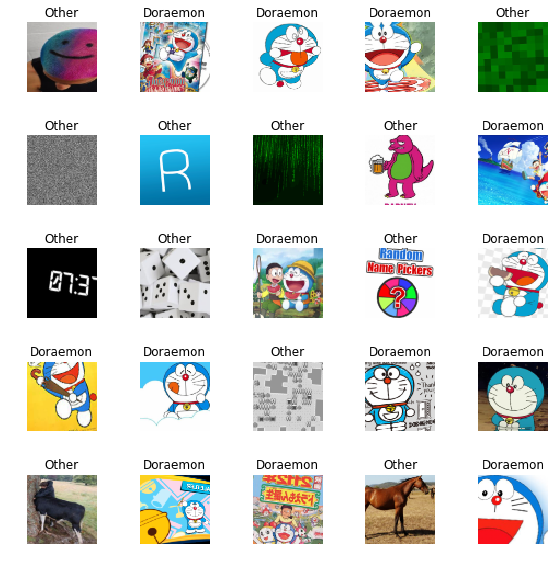

In [21]:
data.show_batch(5,figsize=(8,8))

In [28]:
learn = create_cnn(data,models.resnet18,metrics=accuracy)

/opt/conda/lib/python3.6/site-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [29]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.878292,0.966264,0.472222,00:03
1,0.755941,0.784418,0.527778,00:03
2,0.639009,0.560104,0.750000,00:03
3,0.585604,0.525257,0.833333,00:03


In [30]:
learn.save('Stage1')

In [31]:
intepret = ClassificationInterpretation.from_learner(learn)
losses,index = intepret.top_losses()
len(data.valid_ds) == len(losses) == len(index)

True

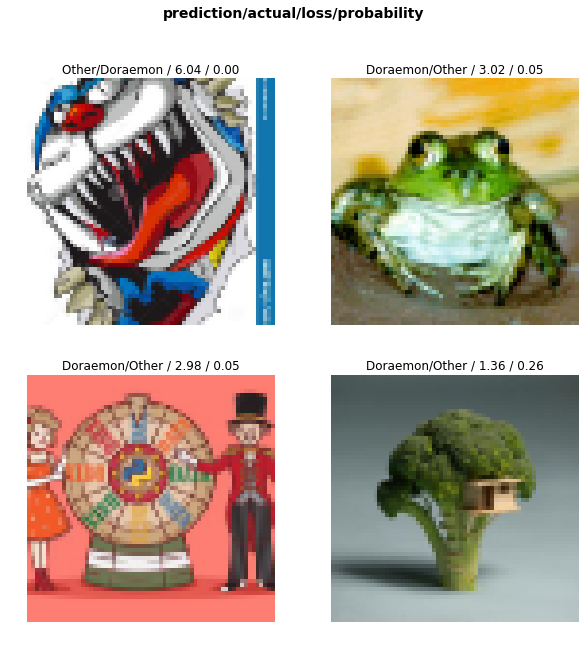

In [35]:
intepret.plot_top_losses(4,figsize=(10,10))

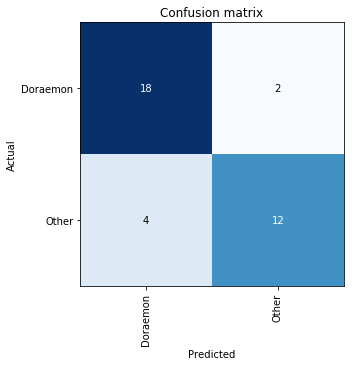

In [36]:
intepret.plot_confusion_matrix(figsize=(5,5))

In [37]:
learn.unfreeze()

In [38]:
learn.load('Stage1')

Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/opt/conda/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/conda/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/opt/conda/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/conda/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/opt/conda/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
  File "/opt/conda/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/opt/conda/lib/python3.6/multiprocessing/connection.py", 

Learner(data=ImageDataBunch;

Train: LabelList (145 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Doraemon,Doraemon,Doraemon,Doraemon,Doraemon
Path: Data/Images;

Valid: LabelList (36 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Doraemon,Doraemon,Doraemon,Other,Other
Path: Data/Images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [39]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.327118,0.511390,0.805556,00:05


In [40]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


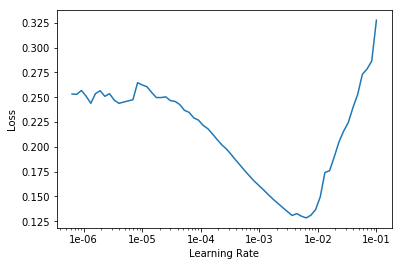

In [41]:
learn.recorder.plot()

In [42]:
learn.fit_one_cycle(2,max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.299554,0.507169,0.805556,00:05
1,0.229957,0.487880,0.833333,00:05
